# Fact finder - a Fact Search Engine - Basic Models
Information Retrieval **Project** - *A.Y. 2023/24*

**Team**:
*   **Mattia Piazzalunga** - 851931
*   **Nicolò Urbani** - 856213

**Beanchmark datasets**:

*   **FEVER dataset** - CHIII et al.

## Global Variables and Functions

In [ ]:
index_path = "/content/drive/MyDrive/InformationRetrieval-Fever-index/indices/beir_fever"
index_path2 = "/content/drive/MyDrive/InformationRetrieval-Fever-index/indices2/beir_fever"
model_path = "/content/drive/MyDrive/Information Retrieval-Fever-index/models"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [ ]:
!pip install python-terrier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 865.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.2/335.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.1 MB/s eta 0:00:00
  Preparing metadata (setu

In [ ]:
import pyterrier as pt
pt.init(tqdm='notebook')

terrier-assemblies 5.8 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.10.0 has loaded Terrier 5.8 (built by craigm on 2023-11-01 18:05) and terrier-helper 0.0.8



In [ ]:
!pip install --upgrade -q git+https://github.com/Georgetown-IR-Lab/OpenNIR

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.3/114.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.1/158.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 731.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.1 MB/s eta 0:00:00


In [ ]:

## Pyterries
import pyterrier as pt
from pyterrier.measures import *
from sklearn.ensemble import RandomForestRegressor

#Reranking
import onir_pt

#Graph
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict


#Wordcloud
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Import dataset

In [ ]:
#Train
dataset_train = pt.get_dataset('irds:beir/fever/train')

#Validation
dataset_validation = pt.get_dataset('irds:beir/fever/dev')

#Test
dataset_test = pt.get_dataset('irds:beir/fever/test')

In [ ]:
#Train
queries_train = dataset_train.get_topics(variant = "text")

#Validation
queries_validation =  dataset_validation.get_topics(variant = "text")

#Test
queries_test = dataset_test.get_topics(variant = "text")

[INFO] [starting] opening zip file
[INFO] If you have a local copy of https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/fever.zip, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/5a818580227bfb4b35bb6fa46d9b6c03
[INFO] [starting] https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/fever.zip
[INFO] [finished] https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/fever.zip: [47.85s] [1.24GB] [25.9MB/s]
[INFO] [finished] opening zip file [48.90s]
[INFO] [starting] opening zip file
[INFO] [finished] opening zip file s]
[INFO] [starting] opening zip file
[INFO] [finished] opening zip file s]
[INFO] [starting] opening zip file
[INFO] [finished] opening zip file s]


## Indexing for Basic Models

In [ ]:
dataset = pt.get_dataset('irds:beir/fever') # use a pyterrier dataset object here
indexer = pt.IterDictIndexer(index_path, meta={'docno': 600})
index_ref = indexer.index(dataset.get_corpus_iter(), fields=['title', 'text'])

beir/fever documents:   0%|          | 0/5416568 [00:00<?, ?it/s]

19:09:06.010 [ForkJoinPool-1-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (1941_in_paleontology) - further warnings are suppressed
20:14:44.268 [ForkJoinPool-1-worker-3] WARN org.terrier.structures.indexing.Indexer - Indexed 20592 empty documents


### Save and Load Index

In [ ]:
index_ref = pt.IndexRef.of(index_path)
index = pt.IndexFactory.of(index_ref)

In [ ]:
print(f"Index statistics:\n{index.getCollectionStatistics().toString()}")

Index statistics:
Number of documents: 5416568
Number of terms: 2471240
Number of postings: 203556545
Number of fields: 1
Number of tokens: 269889695
Field names: [text]
Positions:   false



## Explorative Analysis

### Documents Collection Word Cloud

In [ ]:
terms = []
frequencies = []

for term, le in index.getLexicon():
    terms.append(term)
    frequencies.append(le.getFrequency())

# Create a dictionary from the terms and frequencies
word_freq = {term: freq for term, freq in zip(terms, frequencies)}

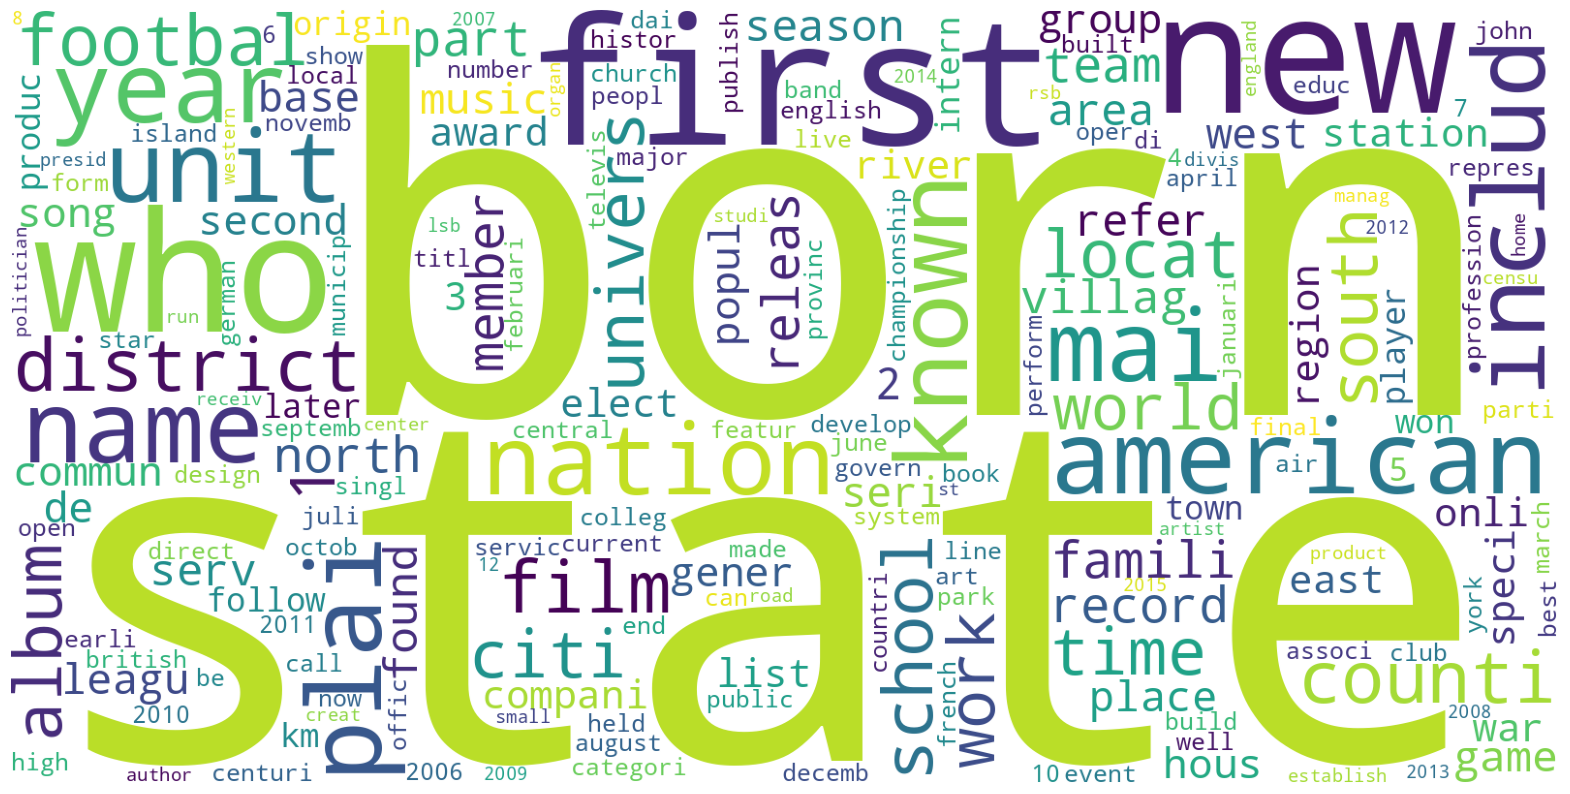

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color ='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(20,14))
plt.imshow(wordcloud, interpolation='antialiased')
plt.axis('off')
plt.show()

###Word Frequency in Document Collection

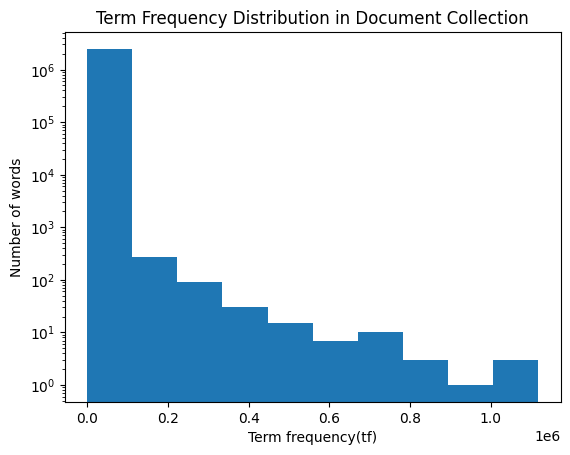

In [ ]:
plt.hist(frequencies,log=True)
plt.xlabel("Term frequency(tf)")
plt.ylabel("Number of words")
plt.title("Term Frequency Distribution in Document Collection")
plt.show()

### Queries Length Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


queries_train_analysis = pd.DataFrame()
queries_validation_analysis = pd.DataFrame()
queries_test_analysis = pd.DataFrame()

queries_train_analysis['query_length'] = queries_train['query'].apply(lambda x: len(str(x)) - str(x).count(" "))
queries_validation_analysis['query_length'] = queries_validation['query'].apply(lambda x: len(str(x)) - str(x).count(" "))
queries_test_analysis['query_length'] = queries_test['query'].apply(lambda x: len(str(x)) - str(x).count(" "))

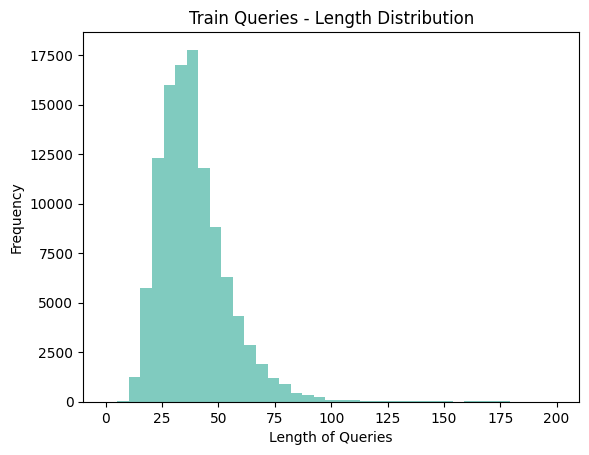

In [ ]:
# Train Queries Distribution
import numpy as np
bins = np.linspace(0, 200, 40)

plt.hist(queries_train_analysis["query_length"], bins, color="#80cbbf")

plt.title('Train Queries - Length Distribution')
plt.xlabel('Length of Queries')
plt.ylabel('Frequency')

plt.show()

In [ ]:
print(queries_train_analysis['query_length'].describe())

count    109810.000000
mean         39.038184
std          16.618665
min           9.000000
25%          28.000000
50%          36.000000
75%          47.000000
max         516.000000
Name: query_length, dtype: float64


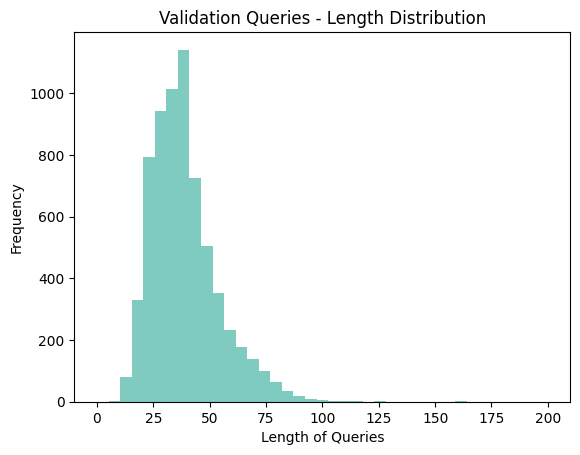

In [ ]:
# Validation Queries Dsitribution

bins = np.linspace(0, 200, 40)

plt.hist(queries_validation_analysis["query_length"], bins, color="#80cbbf")

plt.title('Validation Queries - Length Distribution')
plt.xlabel('Length of Queries')
plt.ylabel('Frequency')

plt.show()

In [ ]:
print(queries_validation_analysis['query_length'].describe())

count    6666.000000
mean       38.776628
std        14.795147
min        10.000000
25%        28.000000
50%        37.000000
75%        46.000000
max       162.000000
Name: query_length, dtype: float64


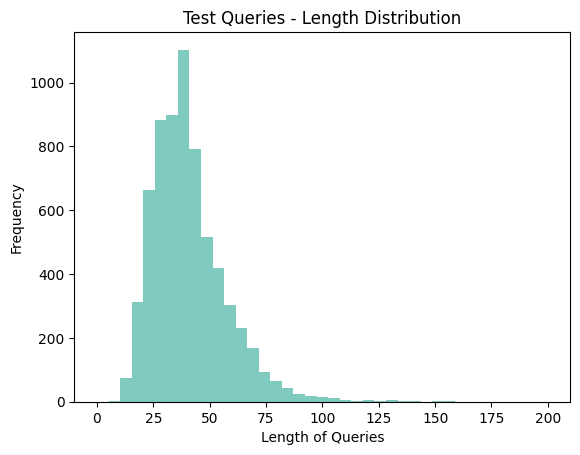

In [ ]:
# Test Queries Dsitribution

bins = np.linspace(0, 200, 40)

plt.hist(queries_test_analysis["query_length"], bins, color="#80cbbf")

plt.title('Test Queries - Length Distribution')
plt.xlabel('Length of Queries')
plt.ylabel('Frequency')

plt.show()

In [ ]:
print(queries_test_analysis['query_length'].describe())

count    6666.000000
mean       40.722622
std        16.452091
min        10.000000
25%        29.000000
50%        38.000000
75%        49.000000
max       155.000000
Name: query_length, dtype: float64


### Query Length BoxPlot

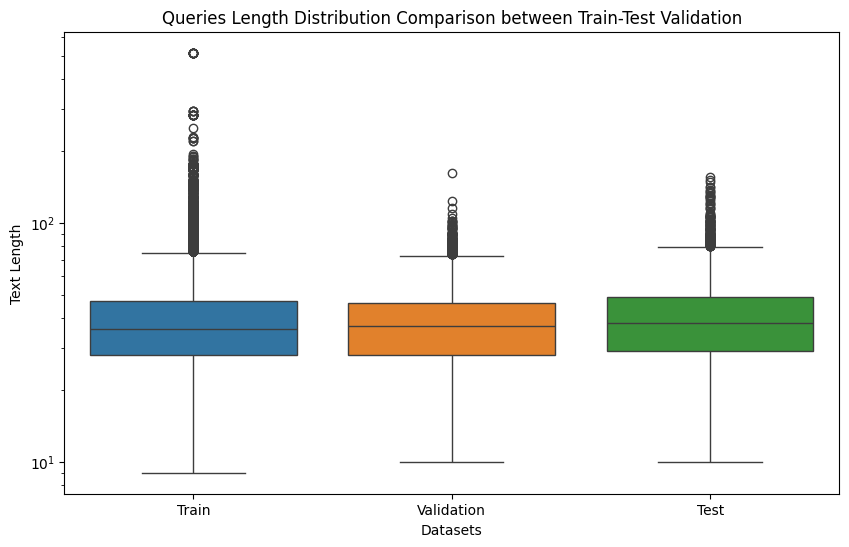

In [ ]:
# Boxplot Train Validation Test Comparison
combined_df = pd.concat([queries_train_analysis[['query_length']], queries_validation_analysis[['query_length']], queries_test_analysis[['query_length']]],
                        axis=1, keys=['Train', 'Validation', 'Test'])

# Plotting the box plot with logarithmic scale
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df)
plt.title('Queries Length Distribution Comparison between Train-Test Validation')
plt.ylabel('Text Length')
plt.xlabel('Datasets')
plt.yscale('log')
plt.show()

###Query Word Cloud

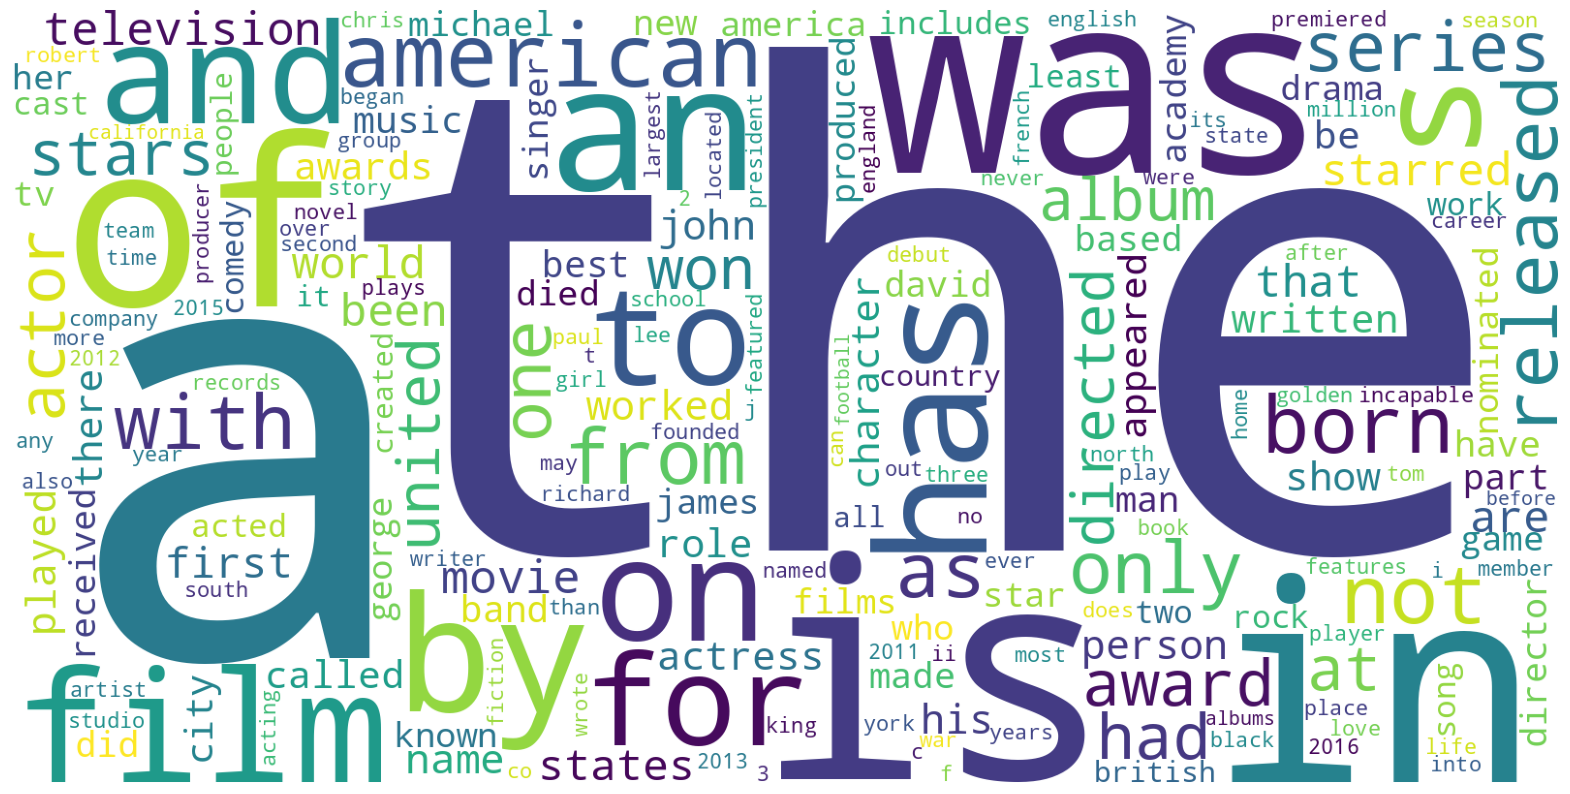

In [ ]:
#Word-Cloud Wrods distribution train set
tokens = [word_tokenize(str(sublist)) for sublist in queries_train['query']]

words = [item for sublist in tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

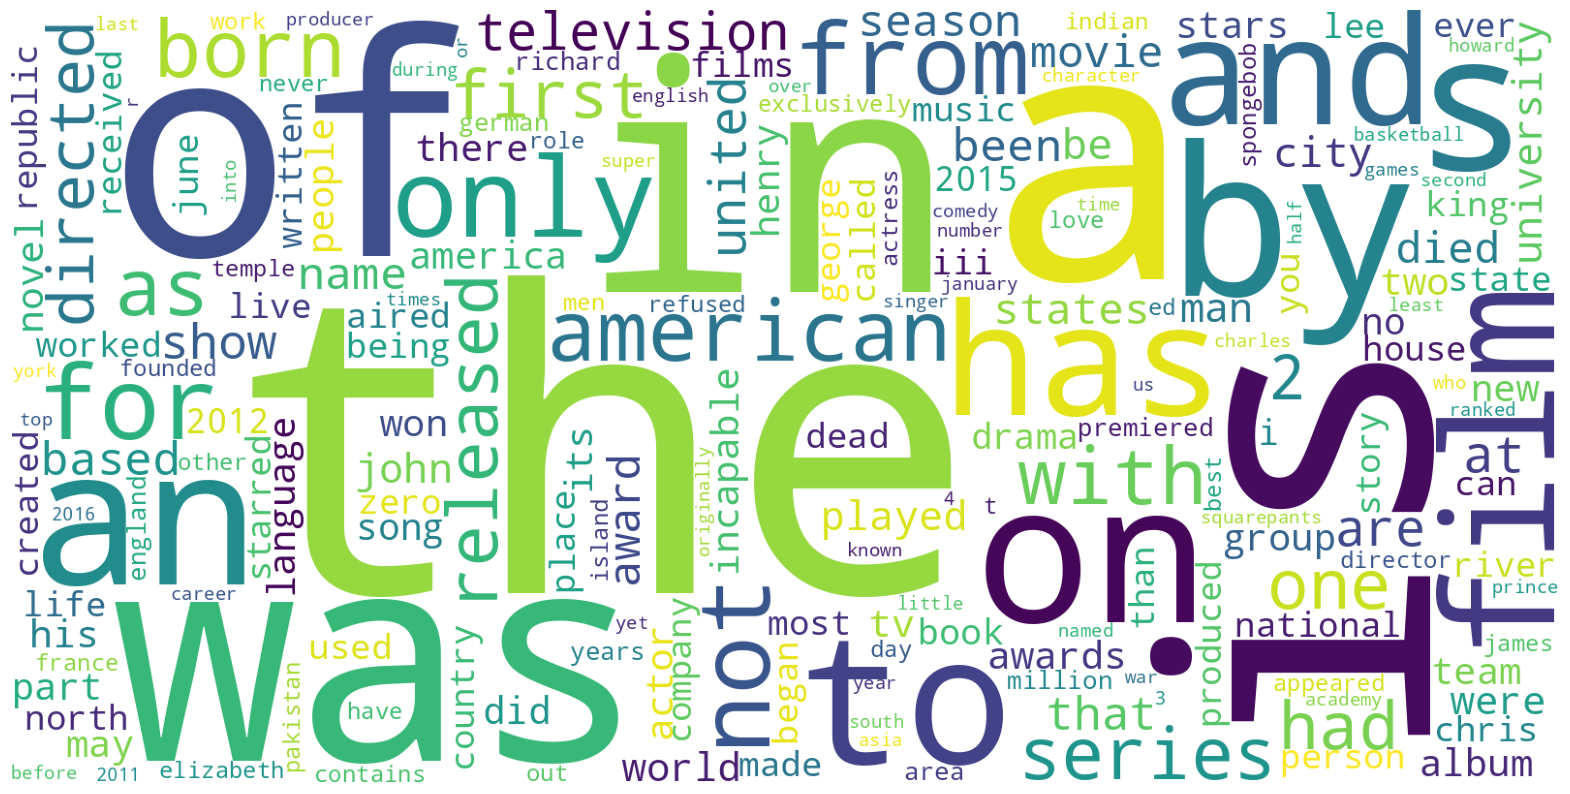

In [ ]:
#Word-Cloud Wrods distribution test set
tokens = [word_tokenize(str(sublist)) for sublist in queries_test['query']]

words = [item for sublist in tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

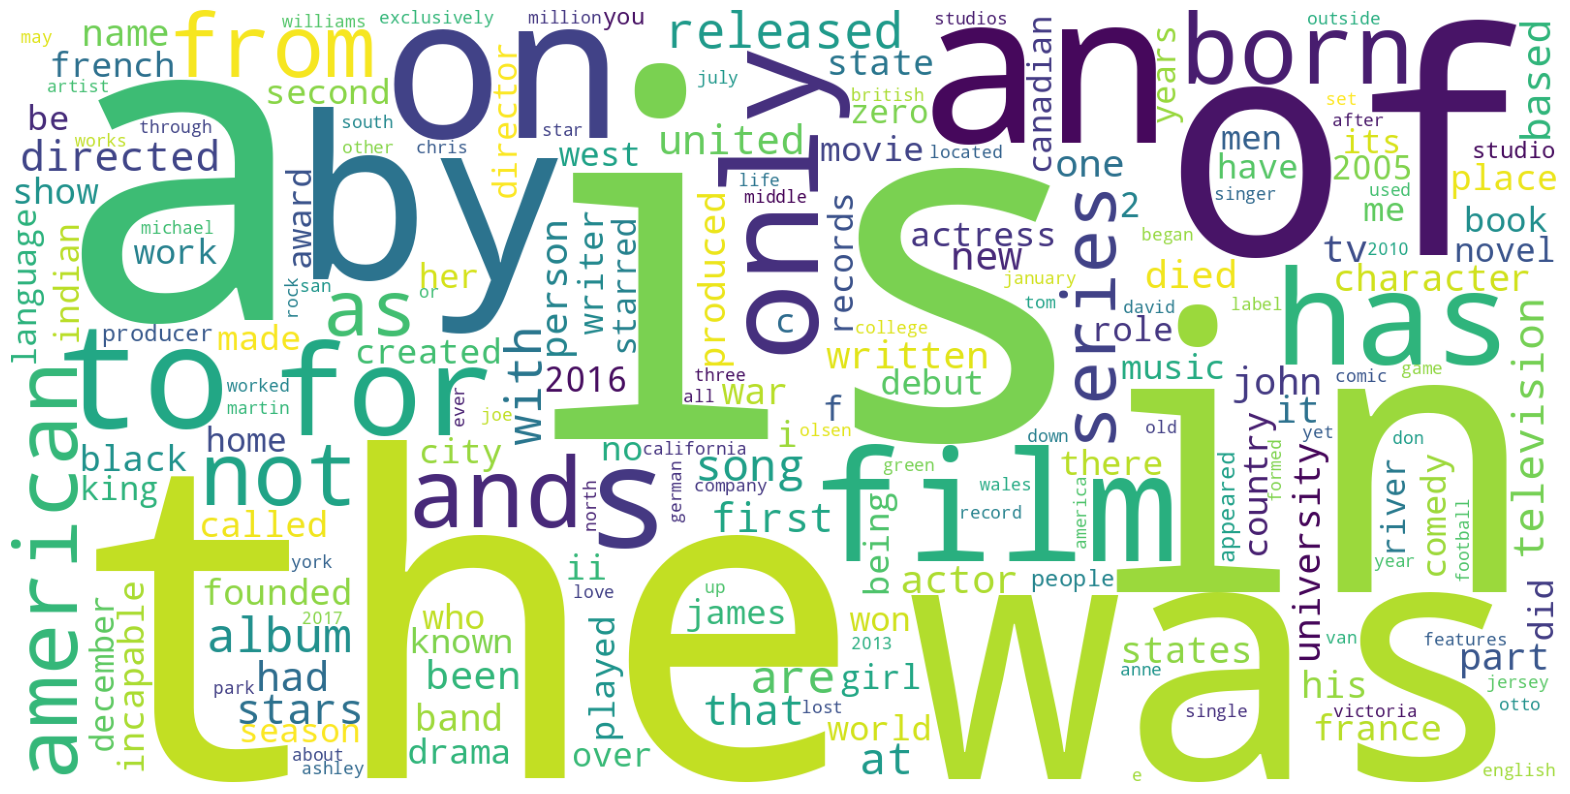

In [ ]:
#Word-Cloud Wrods distribution validation set
tokens = [word_tokenize(str(sublist)) for sublist in queries_validation['query']]

words = [item for sublist in tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

## Simple Models

### TF-IDF

In [ ]:
#TF-IDF
tf_idf_model = pt.BatchRetrieve(index_ref, num_results = 50, wmodel="TF_IDF")

22:12:33.142 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - File /content/drive/MyDrive/Information Retrieval-Fever-index/indices/beir_fever/data.meta-0.fsomapfile containing reverse meta mapping for keydocno is missing. Reverse lookups for this key will be disabled


###BM25

In [ ]:
#BM25 Model
bm25_model = pt.BatchRetrieve(index_ref, num_results = 50,  wmodel='BM25')

22:12:37.196 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - File /content/drive/MyDrive/Information Retrieval-Fever-index/indices/beir_fever/data.meta-0.fsomapfile containing reverse meta mapping for keydocno is missing. Reverse lookups for this key will be disabled


In [ ]:
results = pt.Experiment(
    [tf_idf_model, bm25_model], #, pipeline_bo1, pipeline_rm3
    dataset_test.get_topics(),
    dataset_test.get_qrels(),
    [P@5, P@10, R@5, R@10, 'map', nDCG@20, 'ndcg', 'recip_rank'],
    verbose=True,
    batch_size=264,
    names=["TF_IDF", "BM25"]
)

pt.Experiment:   0%|          | 0/52 s<?, ?batches/s]

In [ ]:
results

,name,P@5,P@10,R@5,R@10,map,nDCG@20,ndcg,recip_rank
0,TF_IDF,0.107471,0.064971,0.497125,0.596842,0.373846,0.447966,0.465322,0.391659
1,BM25,0.107411,0.065002,0.496825,0.597030,0.373279,0.447205,0.464884,0.391029


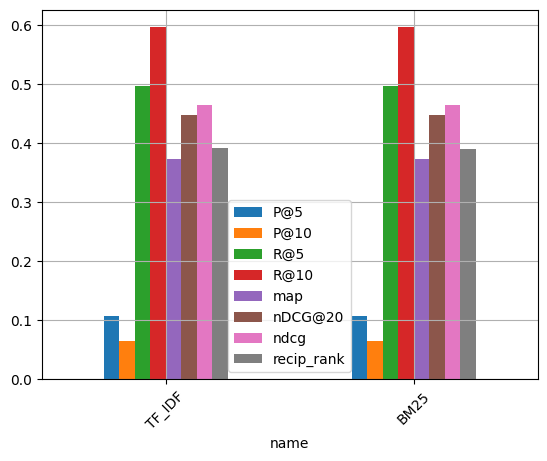

In [ ]:
results.plot.bar(x='name')
plt.xticks(rotation = 45)
plt.grid(True)

Model Impact on Real Query

In [ ]:
bm25_model.search("Firefox is a computer game")

,qid,docid,docno,rank,score,query
0,1,1661512,Firefox_Portable,0,33.148275,Firefox is a computer game
1,1,1643760,Firefox_for_Android,1,31.226661,Firefox is a computer game
2,1,1693421,Firefox_Sync,2,29.974616,Firefox is a computer game
3,1,1705595,FireTune,3,28.465207,Firefox is a computer game
4,1,4212581,River_Trail_(JavaScript_engine),4,27.062045,Firefox is a computer game
5,1,1687831,Firefox_3.6,5,26.267953,Firefox is a computer game
6,1,4197409,Rombertik,6,25.853563,Firefox is a computer game
7,1,300601,Agent_F.O.X.,7,25.581340,Firefox is a computer game
8,1,2842906,Lightbeam_(software),8,25.053737,Firefox is a computer game
9,1,1657754,Firefox_OS,9,24.977093,Firefox is a computer game


In [ ]:
tf_idf_model.search("Firefox is a computer game")

,qid,docid,docno,rank,score,query
0,1,1661512,Firefox_Portable,0,18.107317,Firefox is a computer game
1,1,1643760,Firefox_for_Android,1,17.049271,Firefox is a computer game
2,1,1693421,Firefox_Sync,2,16.364326,Firefox is a computer game
3,1,1705595,FireTune,3,15.552895,Firefox is a computer game
4,1,4212581,River_Trail_(JavaScript_engine),4,14.816217,Firefox is a computer game
5,1,1687831,Firefox_3.6,5,14.337230,Firefox is a computer game
6,1,4197409,Rombertik,6,14.124550,Firefox is a computer game
7,1,300601,Agent_F.O.X.,7,13.975827,Firefox is a computer game
8,1,2842906,Lightbeam_(software),8,13.687582,Firefox is a computer game
9,1,1657754,Firefox_OS,9,13.636651,Firefox is a computer game


###BM25 Tuned

When using BatchRetrieve, the b parameter of the BM25 weighting model can be controled using the “bm25.b” control. We must give this control an initial value when contructing the BatchRetrieve instance. Thereafter, the GridSearch parameter dictionary can be constructed by refering to the instance of transformer that has that parameter:
evalutate the model on the metric MAP

b parameters control between 0 and 1 controls the amount of correction for the lenght, if 1 effect are amplified

k1 control the saturation don't impact a lot if a term appear a lot

In [ ]:
'''BM25 = pt.BatchRetrieve(index, wmodel="BM25", controls={"bm25.b" : 0.75, "bm25.k_1": 0.75, "bm25.k_3": 0.75})
pt.GridSearch(
    BM25,
    {BM25: {"bm25.b"  : [0,  0.5, 1 ],
            "bm25.k_1": [0.3,  1.2, 2],
            "bm25.k_3": [0.5, 10, 20]
    }},
    dataset_validation.get_topics(),
    dataset_validation.get_qrels(),
    "map")'''

This is the tuned version, considering the tuning process runned on Kaggle. In particular we get the following output

Best map is 0.578247
Best setting is ['BR(BM25) bm25.b=0.5', 'BR(BM25) bm25.k_1=0.3', 'BR(BM25) bm25.k_3=20']

In [ ]:
bm25_model_tuned = pt.BatchRetrieve(index_ref, wmodel="BM25",
                                   controls={"bm25.b" : 0.5, "bm25.k_1": 0.3, "bm25.k_3": 20})

In [ ]:
pt.Experiment(
    [bm25_model_tuned],
    dataset_test.get_topics(),
    dataset_test.get_qrels(),
    [P@5, P@10, R@5, R@10, 'map', nDCG@20, 'ndcg', 'recip_rank', ],
    verbose=True,
    batch_size=264
)

pt.Experiment:   0%|          | 0/26 s<?, ?batches/s]

,name,P@5,P@10,R@5,R@10,map,nDCG@20,ndcg,recip_rank
0,BR(BM25),0.136694,0.077948,0.628813,0.710563,0.503959,0.571182,0.599006,0.526924


In [ ]:
bm25_model_tuned.search('Firefox is a computer game')

,qid,docid,docno,rank,score,query
0,1,4212581,River_Trail_(JavaScript_engine),0,26.035720,Firefox is a computer game
1,1,4536369,Spatial_navigation,1,24.418233,Firefox is a computer game
2,1,1696167,FF2,2,24.252484,Firefox is a computer game
3,1,1661512,Firefox_Portable,3,24.179637,Firefox is a computer game
4,1,3816930,PlayCanvas,4,24.160745,Firefox is a computer game
...,...,...,...,...,...,...
995,1,1199359,Crash_Bash,995,12.740956,Firefox is a computer game
996,1,4379005,Seumas_McNally,996,12.740956,Firefox is a computer game
997,1,5397454,Yggdrasil_(disambiguation),997,12.739915,Firefox is a computer game
998,1,4617686,Steve_Barcia,998,12.734681,Firefox is a computer game


## Simple Models with query Expansion

BO1
This class applies the Bo1 Divergence from Randomess query expansion model to rewrite the query based on the occurences of terms in the feedback documents provided for each query. In this way, it takes in a dataframe with columns [“qid”, “query”, “docno”, “score”, “rank”] and returns a dataframe with [“qid”, “query”].

In [ ]:
#Query expansion - bo1
bo1 = pt.rewrite.Bo1QueryExpansion(index)
pipeline_bo1 = (bm25_model_tuned >> bo1 >> bm25_model_tuned)

In [ ]:
pipelineDisplay = bm25_model_tuned >> bo1

In [ ]:
pipelineDisplay.search("Firefox is a computer game")

,qid,query_0,query
0,1,Firefox is a computer game,applypipeline:off firefox^1.652677526 comput^1...


In [ ]:
results = pt.Experiment(
    [pipeline_bo1],
    dataset_test.get_topics(),
    dataset_test.get_qrels(),
    [P@5, P@10, R@5, R@10, 'map', nDCG@20, 'ndcg', 'recip_rank'],
    verbose=True,
    batch_size=264,
    names=[" TUNED BM25 + B01"]
)

pt.Experiment:   0%|          | 0/26 s<?, ?batches/s]

In [ ]:
results

,name,P@5,P@10,R@5,R@10,map,nDCG@20,ndcg,recip_rank
0,TUNED BM25 + B01,0.140684,0.079583,0.644273,0.722485,0.504511,0.573729,0.599942,0.527246


In [ ]:
pipeline_bo1.search('Firefox is a computer game')

,qid,docid,docno,rank,score,query_0,query
0,1,4536369,Spatial_navigation,0,29.472420,Firefox is a computer game,applypipeline:off firefox^1.652677526 comput^1...
1,1,1643760,Firefox_for_Android,1,27.511093,Firefox is a computer game,applypipeline:off firefox^1.652677526 comput^1...
2,1,1696167,FF2,2,27.051403,Firefox is a computer game,applypipeline:off firefox^1.652677526 comput^1...
3,1,3816930,PlayCanvas,3,26.450392,Firefox is a computer game,applypipeline:off firefox^1.652677526 comput^1...
4,1,1657754,Firefox_OS,4,26.086535,Firefox is a computer game,applypipeline:off firefox^1.652677526 comput^1...
...,...,...,...,...,...,...,...
995,1,5133679,Wagan_Land,995,9.957212,Firefox is a computer game,applypipeline:off firefox^1.652677526 comput^1...
996,1,3472529,New_Generation_Software,996,9.957066,Firefox is a computer game,applypipeline:off firefox^1.652677526 comput^1...
997,1,880458,CIG,997,9.956732,Firefox is a computer game,applypipeline:off firefox^1.652677526 comput^1...
998,1,853519,Brad_Fregger,998,9.956119,Firefox is a computer game,applypipeline:off firefox^1.652677526 comput^1...
